# Digits Recognition Model using Neural Network

### Problem statement

Use Handwritten Digits data (from [`sklearn.datasets.load_digits`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)) to build a classification model to identify the digits (from 0 to 9) using Artificial Neural Network.

![sklean-load-digits](https://bitbucket.org/vishal_derive/nn-intro/raw/e31440199b602082494ba7e1c20ea56c25508738/misc/load_digits.png)

* Source: 
    * [Scikit-learn `load_digits` dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) 

### Load data

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels:

In [2]:
digits.images[:3]

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]],

       [[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
        [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
        [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
        [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0

In [3]:
# the first record (image pixles)
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [4]:
# true lable for the first image
digits.target[0]

0

### Visualize data

Let's take a look at the first image.

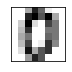

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(1, 1))
plt.imshow(digits.images[0], cmap='binary')
plt.xticks([])
plt.yticks([]);

Since these images are small (containing only 64 pixles), it's a bit difficult to see it clearly. We can use interpolation technique to improve visibility.

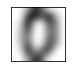

In [6]:
plt.figure(figsize=(1, 1))
plt.imshow(digits.images[0], cmap='binary', interpolation='bicubic')
plt.xticks([])
plt.yticks([]);

* Useful Resource: 
    * [Matplotlib: Image tutorial](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py)

Let's take a look at the first 100 images, along with their true lables.

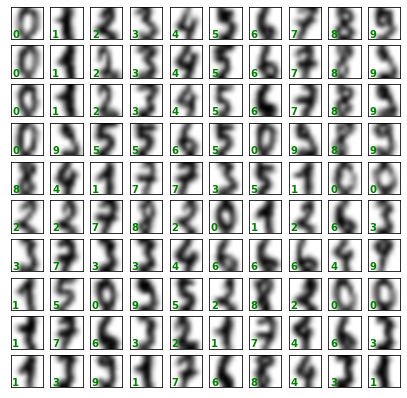

In [7]:
# create a 10x10 grid (subplots)
fig, axes = plt.subplots(10, 10, 
                         figsize=(7, 7), 
                         subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], 
              cmap='binary', 
              interpolation='bicubic')
    
    ax.text(0.05, 0.05, 
            str(digits.target[i]), # true labels
            color='green', 
            weight='semibold', 
            transform=ax.transAxes)

### Prepare data for modeling

In [8]:
# grab all data (1797 records, and 8x8=64 columns)
X = digits.data

# grab the labels (true values) for each image
y = digits.target

print(X.shape, y.shape)

(1797, 64) (1797,)


In [9]:
# split the datasets into train and test partitions (75/25)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_raw, y_test_raw = train_test_split(X, y, random_state=314)

print(X_train.shape, y_train_raw.shape, X_test.shape, y_test_raw.shape)

(1347, 64) (1347,) (450, 64) (450,)


In [10]:
y_train_raw[:10]

array([3, 9, 4, 9, 5, 7, 7, 3, 9, 3])

In [11]:
# convert vector into binary matrix
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train_raw, 10)
y_test = to_categorical(y_test_raw, 10)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1347, 64) (1347, 10) (450, 64) (450, 10)


In [12]:
y_train[:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
# sum of each column (number of samples for each digit)
y_train.sum(axis=0)

array([133., 134., 133., 141., 134., 142., 141., 127., 123., 139.],
      dtype=float32)

In [14]:
# % of samples for each digit
y_train.sum(axis=0) / y_train.shape[0]

array([0.09873793, 0.09948032, 0.09873793, 0.10467706, 0.09948032,
       0.10541945, 0.10467706, 0.0942836 , 0.09131403, 0.10319228],
      dtype=float32)

### Build a Logistic Regression model

In [15]:
from sklearn.linear_model import LogisticRegression

# define the model object
clf = LogisticRegression(solver='liblinear', random_state=314)

# fit (train) the model
clf.fit(X_train, y_train_raw)

# make predictions on the test data
y_preds = clf.predict(X_test)

# calculate the accuracy score
from sklearn.metrics import accuracy_score
print(f'Model accuracy: {accuracy_score(y_preds, y_test_raw):.2%}')

Model accuracy: 95.11%


A simple Logistic Regression model seems to be doing a pretty good job of identifying the true lables. 

Note: We should look at other measures as well (such as confusion matrix) because this is an unbalanced dataset. For now, we will proceed to next steps.

### Intro to Multi-layer Perceptron (MLP)

> See the slides 8 to 18 in `../slides/intro_to_neural_networks.pdf`.

### Build a simple Multi-layer Perceptron (MLP) model

Before we start, we need to take a small digression. The keras Neural Network model training results are not easily reproducible since it involves a lot of shuffling and random initializations. In order to maintain consitency, we will have to initialize some random seeds before every model run. We will create a function to do this.

In [16]:
from tensorflow import random as tf_random
import numpy as np
import random

def init_seeds(s):
    '''
    Initializes random seeds prior to model training 
    to ensure reproducibality of training results.
    '''
    tf_random.set_seed(s)
    np.random.seed(s)
    random.seed(s)

* Reflections: 
    * [What's the best practice for comparing models and choosing hyper parameters?](https://stackoverflow.com/questions/59075244/if-keras-results-are-not-reproducible-whats-the-best-practice-for-comparing-mo)

Define a model with one input layer and one output layer.

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense

# initialize seeds
init_seeds(314)

# prepare the model architecture
mlp1 = Sequential(
    [
        Input(shape=8*8),
        Dense(10, activation='softmax', name='output_layer')
    ], 
    name='simple_mlp')

In [18]:
# print model summary
mlp1.summary()

Model: "simple_mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
output_layer (Dense)         (None, 10)                650       
Total params: 650
Trainable params: 650
Non-trainable params: 0
_________________________________________________________________


We have initialized a sequential model with an input shape of 64, and an output layer with a shape of 10. There are 650 total parameters in this model:

In [19]:
# initial weights and biases
mlp1.weights

[<tf.Variable 'output_layer/kernel:0' shape=(64, 10) dtype=float32, numpy=
 array([[-0.01703539, -0.2220978 , -0.01042062, -0.2718577 , -0.08828993,
         -0.17295128, -0.26904708,  0.20786384,  0.17612767, -0.06932472],
        [-0.09567165, -0.05254756, -0.10232159, -0.24669251, -0.02878374,
          0.13024768, -0.08909218, -0.10039796,  0.02799869, -0.21669722],
        [ 0.08619815, -0.10306212, -0.02530003, -0.04052977,  0.01012599,
         -0.10518903, -0.1968749 , -0.08592448, -0.05901991, -0.28333992],
        [-0.09119165, -0.18929563,  0.15801668,  0.03875944,  0.11924675,
         -0.23279181, -0.20940512,  0.10705549, -0.19174051,  0.25950822],
        [-0.12388553,  0.09925586,  0.18737534, -0.2344872 , -0.12788352,
          0.02298173,  0.2601491 ,  0.12575799, -0.21946478,  0.2020691 ],
        [-0.12560605, -0.11388323,  0.04002476, -0.23634908,  0.15100878,
          0.2402229 ,  0.11094248, -0.13343115, -0.17193735, -0.00645611],
        [-0.25725985,  0.002685

* Useful Resources:
    * [Keras Documentation: The Sequential model](https://keras.io/guides/sequential_model/)
    * [TensorFlow API Documentation: `tf.keras.Sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)

Before we can train the model, we need to specify training parameters (aka compile the model).

In [20]:
mlp1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics='accuracy')

In [21]:
mlp1.optimizer

### Train (fit) the model

In [22]:
mlp1.fit(X_train, y_train, shuffle=True);

43/43 [==============================] - 0s 913us/step - loss: 9.5409 - accuracy: 0.2690


The accuracy is very low, because the model made a single pass over the dataset. The model must make multiple passes over the _entire_ dataset in order to produce better results. This can be adjusted by using the `epoch` parameter. 

_`Epoch` is equal to the number of times the algorithm sees the entire dataset._

By the way, what is that mysterious-looking number 43? Where did that come from? 

Keras uses a **batch size** of 32 by default. So this model above created 32 batches of 43 records each by divinding the total number of records in the entire dataset (1,347) by 32. However, the default **epoch** is 1, so the model above made 43 **iterations** (forward + backward) using batches of 52 records.

`batch_size * number of iterations --> epoch`

Note that if you use `shuffle=True` in the `fit()` function, keras will shuffle the records in the training dataset before splitting them into batches.

Let's increase the number of epochs.

In [23]:
# initialize seeds
init_seeds(314)

# prepare the model architecture
mlp2 = Sequential(
    [
        Input(shape=8*8),
        Dense(10, activation='softmax', name='output_layer')
    ], 
    name='simple_mlp_7epochs')

mlp2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics='accuracy')

mlp2.fit(X_train, y_train, epochs=7, shuffle=True);

Epoch 1/7
43/43 [==============================] - 0s 884us/step - loss: 9.5409 - accuracy: 0.2690
Epoch 2/7
43/43 [==============================] - 0s 879us/step - loss: 1.1058 - accuracy: 0.7594
Epoch 3/7
43/43 [==============================] - 0s 847us/step - loss: 0.4381 - accuracy: 0.8723
Epoch 4/7
43/43 [==============================] - 0s 836us/step - loss: 0.3480 - accuracy: 0.8926
Epoch 5/7
43/43 [==============================] - 0s 933us/step - loss: 0.2389 - accuracy: 0.9204
Epoch 6/7
43/43 [==============================] - 0s 856us/step - loss: 0.2273 - accuracy: 0.9279
Epoch 7/7
43/43 [==============================] - 0s 847us/step - loss: 0.2018 - accuracy: 0.9231


Note that now the model is making 7 passes through the entire data. For each epoch, there are 43 iterations (forward + backward) with 32 samples in each iteration.

Let's try to reduce the batch size and see what happens.

In [24]:
# initialize seeds
init_seeds(314)

# prepare the model architecture
mlp3 = Sequential(
    [
        Input(shape=8*8),
        Dense(10, activation='softmax', name='output_layer')
    ], 
    name='simple_mlp_7epochs_5bs')

mlp3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics='accuracy')

mlp3.fit(X_train, y_train, batch_size=5, epochs=7, shuffle=True, verbose=2);

Epoch 1/7
270/270 - 0s - loss: 1.7979 - accuracy: 0.7513
Epoch 2/7
270/270 - 0s - loss: 0.3756 - accuracy: 0.9013
Epoch 3/7
270/270 - 0s - loss: 0.2862 - accuracy: 0.9339
Epoch 4/7
270/270 - 0s - loss: 0.2623 - accuracy: 0.9287
Epoch 5/7
270/270 - 0s - loss: 0.1645 - accuracy: 0.9592
Epoch 6/7
270/270 - 0s - loss: 0.1230 - accuracy: 0.9703
Epoch 7/7
270/270 - 0s - loss: 0.1126 - accuracy: 0.9718


The batch size of 5 gives us 270 iterations for each epoch.

> See slide #21 in `../slides/intro_to_neural_networks.pdf`

* Useful Resource:
    * [Keras FAQ: What do sample, batch, and epoch mean?](https://keras.io/getting_started/faq/#what-do-sample-batch-and-epoch-mean)
* Reflections:
    * [What is the trade-off between batch size and number of iterations to train a neural network?](https://stats.stackexchange.com/questions/164876/what-is-the-trade-off-between-batch-size-and-number-of-iterations-to-train-a-neu)
* **Tip:** Using larger batch sizes will require more memory, and negatively impact the ability of the model to generalize well. On the other hand, very small batch size increases the risk of making the model unreliable (too stochastic.)

### Check the model accuracy on the test sample

In [25]:
loss, accuracy = mlp1.evaluate(X_test, y_test, batch_size=1)

print(f'Loss: {loss:.2%}, Accuracy: {accuracy:.2%}')

450/450 [==============================] - 1s 733us/step - loss: 3.0360 - accuracy: 0.5822
Loss: 303.60%, Accuracy: 58.22%


We will use this multiple times, so let's create a small function for this.

In [26]:
def test_model(model, test_data, lables):
    loss, accuracy = model.evaluate(test_data, lables, batch_size=1)
    print(f'Loss: {loss:.2%}, Accuracy: {accuracy:.2%}')
    
test_model(mlp1, X_test, y_test)

450/450 [==============================] - 0s 745us/step - loss: 3.0360 - accuracy: 0.5822
Loss: 303.60%, Accuracy: 58.22%


In [27]:
test_model(mlp2, X_test, y_test)

450/450 [==============================] - 1s 735us/step - loss: 0.2125 - accuracy: 0.9356
Loss: 21.25%, Accuracy: 93.56%


In [28]:
test_model(mlp3, X_test, y_test)

450/450 [==============================] - 0s 734us/step - loss: 0.2928 - accuracy: 0.9444
Loss: 29.28%, Accuracy: 94.44%


The model with a batch size of five and seven epochs seems to be performing the best.

Next, let's add one hidden layer to this model and see how much improvement it yields.

### Add a hidden layer to the model

In [29]:
# initialize seeds
init_seeds(314)

# prepare the model architecture
mlp4 = Sequential(
    [
        Input(shape=8*8),
        Dense(32, activation='sigmoid', name='hidden_layer'),
        Dense(10, activation='softmax', name='output_layer')
    ],
    name='mlp_1hidden')

mlp4.compile(optimizer='sgd', loss='categorical_crossentropy', metrics='accuracy')

mlp4.fit(X_train, y_train, batch_size=5, epochs=15, shuffle=True, verbose=2);

Epoch 1/15
270/270 - 0s - loss: 1.9616 - accuracy: 0.4187
Epoch 2/15
270/270 - 0s - loss: 1.3873 - accuracy: 0.7543
Epoch 3/15
270/270 - 0s - loss: 1.0583 - accuracy: 0.8508
Epoch 4/15
270/270 - 0s - loss: 0.8460 - accuracy: 0.8961
Epoch 5/15
270/270 - 0s - loss: 0.6875 - accuracy: 0.9243
Epoch 6/15
270/270 - 0s - loss: 0.5754 - accuracy: 0.9317
Epoch 7/15
270/270 - 0s - loss: 0.4919 - accuracy: 0.9451
Epoch 8/15
270/270 - 0s - loss: 0.4233 - accuracy: 0.9503
Epoch 9/15
270/270 - 0s - loss: 0.3725 - accuracy: 0.9525
Epoch 10/15
270/270 - 0s - loss: 0.3320 - accuracy: 0.9599
Epoch 11/15
270/270 - 0s - loss: 0.2978 - accuracy: 0.9659
Epoch 12/15
270/270 - 0s - loss: 0.2723 - accuracy: 0.9681
Epoch 13/15
270/270 - 0s - loss: 0.2506 - accuracy: 0.9710
Epoch 14/15
270/270 - 0s - loss: 0.2301 - accuracy: 0.9725
Epoch 15/15
270/270 - 0s - loss: 0.2127 - accuracy: 0.9755


In [30]:
test_model(mlp4, X_test, y_test)

450/450 [==============================] - 1s 797us/step - loss: 0.2765 - accuracy: 0.9511
Loss: 27.65%, Accuracy: 95.11%


Adding one hidden layer, and increasing the number of epochs, improved the model's accuracy.

* Reflections:
    * [How to choose the number of hidden layers and the size of hidden layers?](https://stackoverflow.com/questions/10565868/multi-layer-perceptron-mlp-architecture-criteria-for-choosing-number-of-hidde?lq=1)
    * [Why are neural networks becoming deeper, but not wider?](https://stats.stackexchange.com/questions/222883/why-are-neural-networks-becoming-deeper-but-not-wider)

### Try a different activation function (`relu`)

In [31]:
# initialize seeds
init_seeds(314)

# prepare the model architecture
mlp5 = Sequential(
    [
        Input(shape=8*8),
        Dense(32, activation='relu', name='hidden_layer'),
        Dense(10, activation='softmax', name='output_layer')
    ],
    name='mlp_1hidden_relu')

mlp5.compile(optimizer='sgd', loss='categorical_crossentropy', metrics='accuracy')

mlp5.fit(X_train, y_train, batch_size=5, epochs=15, shuffle=True, verbose=0)

test_model(mlp5, X_test, y_test)

450/450 [==============================] - 1s 818us/step - loss: 0.1813 - accuracy: 0.9511
Loss: 18.13%, Accuracy: 95.11%


Changing the activation function for the hidden layer did not improve the model performance for this dataset. However, the `relu` activation function usually outperforms `sigmoid` and it's usually preferred.

### Try a different optimizer (`adam`)

In [32]:
# initialize seeds
init_seeds(314)

# prepare the model architecture
mlp6 = Sequential(
    [
        Input(shape=8*8),
        Dense(32, activation='relu', name='hidden_layer'),
        Dense(10, activation='softmax', name='output_layer')
    ],
    name='mlp_1hidden_adam')

mlp6.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

mlp6.fit(X_train, y_train, batch_size=5, epochs=15, shuffle=True, verbose=0)

test_model(mlp6, X_test, y_test)

450/450 [==============================] - 1s 820us/step - loss: 0.1311 - accuracy: 0.9622
Loss: 13.11%, Accuracy: 96.22%


The `adam` optimizer improved the model's performance. 

* Useful Resource: 
    * [Keras Documentation: Adam](https://keras.io/api/optimizers/adam/)

### Plot confusion matrix

In [33]:
# calculate predicted probabilities
probs = mlp6.predict(X_test)
probs[:2]

array([[1.9275463e-13, 9.9973744e-01, 2.6786996e-05, 1.0724898e-06,
        8.1516646e-06, 1.8876994e-05, 1.3232278e-05, 1.6578835e-07,
        1.9441335e-04, 2.9286762e-09],
       [3.8857893e-13, 1.6406758e-04, 9.9982697e-01, 9.0505964e-06,
        4.2048530e-12, 6.4333794e-12, 9.5954064e-11, 4.6730289e-12,
        1.3278320e-10, 2.9341803e-11]], dtype=float32)

In [34]:
# we can use formatted string literal to print float values instead
[f'{x:.5f}' for x in probs[0]]

['0.00000',
 '0.99974',
 '0.00003',
 '0.00000',
 '0.00001',
 '0.00002',
 '0.00001',
 '0.00000',
 '0.00019',
 '0.00000']

The model returns a probability for each lable (digit). We can grab the lable (digit) that has the highest probability. For example, for the first sample, the model is predicting a very high probability of 0.99974 for that digit to be 1.

In [35]:
# grab the digit with max probability
y_preds = [np.argmax(x) for x in probs]
y_preds[:2]

[1, 2]

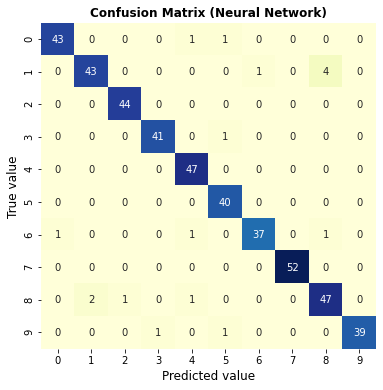

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cfm = confusion_matrix(y_test_raw, y_preds)
plt.figure(figsize=(6, 6))

sns.heatmap(cfm, annot=True, cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted value', fontsize=12)
plt.ylabel('True value', fontsize=12)
plt.title('Confusion Matrix (Neural Network)', fontsize=12, weight='semibold');

* Useful Resource:
    * [seaborn heatmap documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

### Saving (exporting) the model

Save the model as a single HDF5 file. [HDF5 stands for Hierarchical Data Format, v5.]

In [37]:
mlp_path = '../models/digits_recognition_mlp_model.h5'

mlp6.save(mlp_path)

This saves the trained model and all trackable objects (config, weights, and optimizer) attached to the model.

### Load a saved model

We can load a pre-trained (and saved) model by using `load_model()` function.

In [38]:
from tensorflow.keras.models import load_model

mlp_loaded = load_model(mlp_path)

mlp_loaded.summary()

Model: "mlp_1hidden_adam"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Dense)         (None, 32)                2080      
_________________________________________________________________
output_layer (Dense)         (None, 10)                330       
Total params: 2,410
Trainable params: 2,410
Non-trainable params: 0
_________________________________________________________________


In [39]:
mlp_loaded.optimizer

In [40]:
# use the model that we just loaded to predict values
mlp_loaded.predict(X_test)

array([[1.9275463e-13, 9.9973744e-01, 2.6786996e-05, ..., 1.6578835e-07,
        1.9441335e-04, 2.9286762e-09],
       [3.8857893e-13, 1.6406758e-04, 9.9982697e-01, ..., 4.6730289e-12,
        1.3278320e-10, 2.9341803e-11],
       [6.7053801e-13, 3.7581234e-08, 2.7677997e-06, ..., 9.9949539e-01,
        1.6355763e-08, 2.6473731e-07],
       ...,
       [4.2291794e-13, 9.9824095e-01, 4.8917491e-06, ..., 7.2491862e-04,
        9.0323499e-04, 6.4434083e-08],
       [9.9677473e-01, 1.2797778e-06, 1.7539621e-07, ..., 2.2577060e-05,
        2.5868774e-03, 2.9552137e-04],
       [8.7492372e-13, 1.5624319e-09, 9.8177469e-01, ..., 1.4982622e-07,
        1.8134004e-05, 2.9433957e-08]], dtype=float32)

* Useful Resources:
    * [Keras: Serialization and saving](https://keras.io/guides/serialization_and_saving/)
    * [Keras: Model saving & serialization APIs](https://keras.io/api/models/model_saving_apis/)

## Miscellaneous Items

### Visualize the predictions

In [41]:
# grab raw model predictions for the entire dataset
preds_raw = mlp6.predict(digits.data)

# view the first ten predictions
preds_raw[:5]

array([[9.9999774e-01, 1.8023916e-12, 2.1551027e-07, 2.2191418e-08,
        1.0842621e-08, 3.7283277e-11, 1.9473172e-10, 1.9128429e-06,
        6.2294553e-10, 9.8305335e-08],
       [6.9354235e-18, 9.9981111e-01, 1.5117562e-09, 2.7098171e-08,
        1.7649659e-04, 7.3935162e-06, 1.0111412e-08, 6.3249723e-07,
        4.2711417e-06, 2.1146869e-08],
       [1.4964335e-11, 3.7149901e-03, 9.9107802e-01, 5.2601820e-07,
        5.5658086e-07, 7.3826631e-12, 4.6485984e-09, 5.1274830e-05,
        5.1545645e-03, 5.1370924e-10],
       [1.7166724e-10, 1.5253336e-08, 7.6922606e-04, 9.9902654e-01,
        9.9590891e-11, 3.4933466e-05, 3.1692030e-10, 3.2056664e-07,
        2.7211856e-06, 1.6621464e-04],
       [1.9446986e-04, 3.1121337e-04, 2.2014949e-11, 5.0102127e-11,
        9.9908054e-01, 8.9995504e-09, 3.7538284e-04, 4.2137208e-06,
        3.4062967e-05, 6.6805041e-09]], dtype=float32)

In [42]:
# grab the predicted digit (based on the highest probability) for the entire dataset
preds = [np.argmax(pred) for pred in mlp6.predict(digits.data)]

# view the first ten predictions
preds[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Let's plot the first 100 predictions. The labels are shown in green if the model predicted the digit correcly, otherwise it's shown in red.

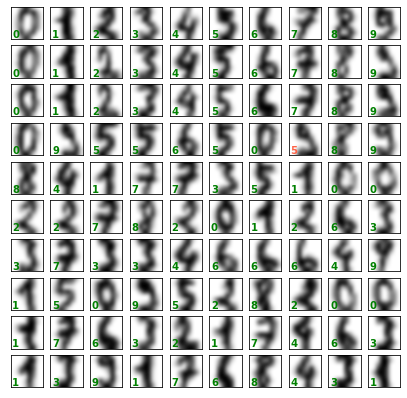

In [43]:
fig, axes = plt.subplots(10, 10, figsize=(7, 7), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='bicubic')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    pred = preds[i]
    act = y[i]
    if pred == act:
        ax.text(0.05, 0.05, preds[i], color='green',
                weight='semibold', transform=ax.transAxes)
    else:
        ax.text(0.05, 0.05, preds[i], color='tomato',
                weight='semibold', transform=ax.transAxes)
plt.show();

### Automatically setting apart a validation set

Instead of manually creating a validation set (like how we did above), we can ask kera to automatially do this for us. In the example below, keras will take 25% of the input dataset and use it for validating the model. Note that the `shuffle=True` option is important here, because otherwise (if `shuffle=False`) keras will take the _bottom_ 25% of the input dataset. This can be problematic if the originally dataset is not shuffled (or sorted in some systematic way).

In [44]:
# initialize seeds
init_seeds(314)

# prepare the model architecture
mlp7 = Sequential(
    [
        Input(shape=8*8),
        Dense(32, activation='relu', name='hidden_layer'),
        Dense(10, activation='softmax', name='output_layer')
    ],
    name='mlp_1hidden_adam_wvalid')

mlp7.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

# create binary matrix from the original lables dataset
y_labels = to_categorical(y, 10)

mlp7.fit(X, y_labels, batch_size=5, epochs=15, validation_split=.25, shuffle=True);

Epoch 1/15
270/270 [==============================] - 2s 5ms/step - loss: 4.0483 - accuracy: 0.2988 - val_loss: 0.9227 - val_accuracy: 0.7289
Epoch 2/15
270/270 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.8439 - val_loss: 0.6006 - val_accuracy: 0.8311
Epoch 3/15
270/270 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9437 - val_loss: 0.5124 - val_accuracy: 0.8600
Epoch 4/15
270/270 [==============================] - 0s 2ms/step - loss: 0.1491 - accuracy: 0.9589 - val_loss: 0.4824 - val_accuracy: 0.8600
Epoch 5/15
270/270 [==============================] - 0s 2ms/step - loss: 0.1177 - accuracy: 0.9670 - val_loss: 0.4188 - val_accuracy: 0.8911
Epoch 6/15
270/270 [==============================] - 0s 2ms/step - loss: 0.0791 - accuracy: 0.9842 - val_loss: 0.4503 - val_accuracy: 0.8978
Epoch 7/15
270/270 [==============================] - 0s 2ms/step - loss: 0.0759 - accuracy: 0.9786 - val_loss: 0.4210 - val_accuracy: 0.8933
Epoch 

### Other ways to save a model

We saw earlier that `save()` function is the most comprehensive way to save the model in its entirety. There are some other ways to save components of the model, rather than the entire model.

In [45]:
# export model architecture into a json file/object
model_architecture = mlp6.to_json()

model_architecture

'{"class_name": "Sequential", "config": {"name": "mlp_1hidden_adam", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 64], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_6"}}, {"class_name": "Dense", "config": {"name": "hidden_layer", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "output_layer", "trainable": true, "dtype": "float32", "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": n

In [46]:
from tensorflow.keras.models import model_from_json

# create a new model from the json architecture
new_mlp = model_from_json(model_architecture)

new_mlp.summary()

Model: "mlp_1hidden_adam"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Dense)         (None, 32)                2080      
_________________________________________________________________
output_layer (Dense)         (None, 10)                330       
Total params: 2,410
Trainable params: 2,410
Non-trainable params: 0
_________________________________________________________________


This model architecture can then use be used to train the model on a new dataset.

### Exercises

**Exercise 1:** In this tutorial, we used MNIST dataset from sklearn. Instead, use MNIST dataset provided by `keras` (from `keras.datasets import mnist`) and build a digits-recognition model using that dataset. (Note: The images in the MNIST dataset provided by `keras` has higher precision: 28x28 pixels.)
    
**Exercise 2:** Using MS Paint or similar software, write a single digit (using your mouse) and save the file with 28x28 pixels. Read this file using openCV (`import cv2`). Use the model developed in Exercise 1 to predict the digit contained in this image